<a href="https://colab.research.google.com/github/COVAANE/COVAANE/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.metrics import accuracy_score,f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [150]:
df = pd.read_csv('//content//data_complete.csv')

In [151]:
data = df.copy()

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303428 entries, 0 to 303427
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   General Health      303428 non-null  object
 1   Physical Health     303428 non-null  int64 
 2   Mental Health       303428 non-null  int64 
 3   High Cholesterol    303428 non-null  object
 4   Stroke              303428 non-null  object
 5   Asthma              303428 non-null  object
 6   Skin Cancer         303428 non-null  object
 7   Chronic bronchitis  303428 non-null  object
 8   Kidney Disease      303428 non-null  object
 9   Diabetes            303428 non-null  object
 10  Difficulty Walking  303428 non-null  object
 11  Tobacco Use         303428 non-null  object
 12  Race                303428 non-null  object
 13  High B.P            303428 non-null  object
 14  Arthritis           303428 non-null  object
 15  Smoking             303428 non-null  object
 16  E 

In [6]:
pd.DataFrame(data.isna().sum()/len(data))

,0
General Health,0.0
Physical Health,0.0
Mental Health,0.0
High Cholesterol,0.0
Stroke,0.0
Asthma,0.0
Skin Cancer,0.0
Chronic bronchitis,0.0
Kidney Disease,0.0
Diabetes,0.0


In [11]:
# Assuming 'data' is a Pandas DataFrame
num_duplicates = data.duplicated().sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 100441


In [9]:
column_list = data.columns.tolist()
print("Column List:")
print(column_list)

Column List:
['General Health', 'Physical Health', 'Mental Health', 'High Cholesterol', 'Stroke', 'Asthma', 'Skin Cancer', 'Chronic bronchitis', 'Kidney Disease', 'Diabetes', 'Difficulty Walking', 'Tobacco Use', 'Race', 'High B.P', 'Arthritis', 'Smoking', 'E Cigarette', 'Sex', 'Age', 'BMI', 'Education', 'Heart Disease']


In [153]:


# Assuming 'data' is a Pandas DataFrame
# Define 'duplicate_columns' as a list of column names that may be involved in duplicates
duplicate_columns = ['General Health', 'Physical Health', 'Mental Health', 'High Cholesterol', 'Stroke', 'Asthma', 'Skin Cancer', 'Chronic bronchitis', 'Kidney Disease', 'Diabetes', 'Difficulty Walking', 'Tobacco Use', 'Race', 'High B.P', 'Arthritis', 'Smoking', 'E Cigarette', 'Sex', 'Age', 'BMI', 'Education', 'Heart Disease']

# Step 1: Confirm Duplicates
is_duplicate = data.duplicated(keep=False)

# Step 2: Identify Duplicates in Specific Columns
duplicate_in_columns = data.duplicated(subset=duplicate_columns, keep=False)

# Step 3: Print Duplicates and Their Counts
print("Total Duplicates:", is_duplicate.sum())
print("Duplicates in Specific Columns:", duplicate_in_columns.sum())

# Optional: Show the duplicated rows
duplicated_rows = data[is_duplicate]
print("Duplicated Rows:")
print(duplicated_rows)

# Optional: Show the duplicates based on specific columns
duplicated_rows_specific_columns = data[duplicate_in_columns]
print("Duplicated Rows in Specific Columns:")
print(duplicated_rows_specific_columns)


Total Duplicates: 126065
Duplicates in Specific Columns: 126065
Duplicated Rows:
       General Health  Physical Health  Mental Health High Cholesterol Stroke  \
4                Good               30              0               No     No   
14               Poor                0              0              Yes     No   
16               Fair                0              0              Yes     No   
27               Fair                0              0              Yes     No   
30               Good                0              0               No     No   
...               ...              ...            ...              ...    ...   
303417           Poor                0              0               No     No   
303419           Good                0              0              Yes     No   
303421           Fair                0              0               No     No   
303422           Good                0              0              Yes     No   
303426           Fair       

In [12]:
import pandas as pd

# Assuming 'data' is a Pandas DataFrame
# Step 1: Confirm Duplicates with Identical Rows
is_identical_duplicates = data.duplicated(keep=False)

# Step 2: Filter the DataFrame to Show Identical Duplicate Rows
identical_duplicate_rows = data[is_identical_duplicates]

# Optional: Print Identical Duplicate Rows
print("Identical Duplicate Rows:")
print(identical_duplicate_rows)


Identical Duplicate Rows:
       General Health  Physical Health  Mental Health High Cholesterol Stroke  \
4                Good               30              0               No     No   
14               Poor                0              0              Yes     No   
16               Fair                0              0              Yes     No   
27               Fair                0              0              Yes     No   
30               Good                0              0               No     No   
...               ...              ...            ...              ...    ...   
303417           Poor                0              0               No     No   
303419           Good                0              0              Yes     No   
303421           Fair                0              0               No     No   
303422           Good                0              0              Yes     No   
303426           Fair                0              0               No     No   

 

In [15]:

# Step 1: Confirm Duplicates with Identical Rows
is_identical_duplicates = data.duplicated() | data.duplicated(keep='last')

# Step 2: Filter the DataFrame to Show Identical Duplicate Rows
identical_duplicate_rows = data[is_identical_duplicates]

# Optional: Print Identical Duplicate Rows
print("Identical Duplicate Rows:")
print(identical_duplicate_rows)



Identical Duplicate Rows:
       General Health  Physical Health  Mental Health High Cholesterol Stroke  \
4                Good               30              0               No     No   
14               Poor                0              0              Yes     No   
16               Fair                0              0              Yes     No   
27               Fair                0              0              Yes     No   
30               Good                0              0               No     No   
...               ...              ...            ...              ...    ...   
303417           Poor                0              0               No     No   
303419           Good                0              0              Yes     No   
303421           Fair                0              0               No     No   
303422           Good                0              0              Yes     No   
303426           Fair                0              0               No     No   

 

In [154]:
# Step 1: Identify the True Identical Duplicates
is_identical_duplicates = data.duplicated() | data.duplicated(keep='last')

# Step 2: Drop the True Identical Duplicates
data_without_duplicates = data.drop_duplicates(keep=False)

# Optional: Print the DataFrame after dropping duplicates
print("DataFrame without True Identical Duplicates:")
print(data_without_duplicates)

DataFrame without True Identical Duplicates:
       General Health  Physical Health  Mental Health High Cholesterol Stroke  \
0           Excellent               20             10              Yes     No   
1                Fair                0              0               No     No   
2                Fair                0             10              Yes     No   
3                Good                0              0               No     No   
5           Very Good                0              0              Yes     No   
...               ...              ...            ...              ...    ...   
303420           Fair                0              0              Yes     No   
303423           Fair                5              0               No     No   
303424      Very Good                0              0              Yes     No   
303425           Fair                0             20               No     No   
303427           Poor                2              2           

In [155]:
data_without_duplicates

,General Health,Physical Health,Mental Health,High Cholesterol,Stroke,Asthma,Skin Cancer,Chronic bronchitis,Kidney Disease,Diabetes,...,Race,High B.P,Arthritis,Smoking,E Cigarette,Sex,Age,BMI,Education,Heart Disease
0,Excellent,20,10,Yes,No,Yes,No,Yes,No,No,...,White,Yes,Yes,No,No,Female,70-74,Underweight,Graduated High School,No
1,Fair,0,0,No,No,No,No,No,No,Yes,...,Black,No,No,No,No,Female,70-74,Overweight,Graduated High School,Yes
2,Fair,0,10,Yes,No,No,No,No,No,Yes,...,White,No,No,No,No,Female,60-64,Obese,Graduated High School,No
3,Good,0,0,No,No,No,No,Yes,No,No,...,White,Yes,No,No,No,Male,80+,Normal,Attended College or Technical School,No
5,Very Good,0,0,Yes,No,No,No,Yes,No,No,...,White,No,Yes,No,No,Male,60-64,Normal,Did not graduate High School,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303420,Fair,0,0,Yes,No,No,No,No,No,Yes,...,Black,No,Yes,No,No,Male,65-69,Obese,Graduated High School,No
303423,Fair,5,0,No,No,No,No,No,No,No,...,Black,Yes,No,No,No,Male,25-29,Overweight,Graduated College or Technical School,No
303424,Very Good,0,0,Yes,No,No,No,No,No,Yes,...,Hispanic,No,No,No,No,Male,65-69,Normal,Did not graduate High School,No
303425,Fair,0,20,No,No,Yes,No,Yes,No,Yes,...,Black,No,No,No,No,Female,30-34,Normal,Graduated High School,No


In [156]:
import pandas as pd

# Assuming 'data_without_duplicates' is the DataFrame without true identical duplicates

# Step 1: Check for Duplicates in the 'data_without_duplicates' DataFrame
are_duplicates_present = data_without_duplicates.duplicated()

# Step 2: Print the Result
if are_duplicates_present.any():
    print("Duplicates are still present in the 'data_without_duplicates' DataFrame.")
else:
    print("No duplicates found in the 'data_without_duplicates' DataFrame.")

No duplicates found in the 'data_without_duplicates' DataFrame.


In [157]:
data=data_without_duplicates.copy()

In [158]:
data

,General Health,Physical Health,Mental Health,High Cholesterol,Stroke,Asthma,Skin Cancer,Chronic bronchitis,Kidney Disease,Diabetes,...,Race,High B.P,Arthritis,Smoking,E Cigarette,Sex,Age,BMI,Education,Heart Disease
0,Excellent,20,10,Yes,No,Yes,No,Yes,No,No,...,White,Yes,Yes,No,No,Female,70-74,Underweight,Graduated High School,No
1,Fair,0,0,No,No,No,No,No,No,Yes,...,Black,No,No,No,No,Female,70-74,Overweight,Graduated High School,Yes
2,Fair,0,10,Yes,No,No,No,No,No,Yes,...,White,No,No,No,No,Female,60-64,Obese,Graduated High School,No
3,Good,0,0,No,No,No,No,Yes,No,No,...,White,Yes,No,No,No,Male,80+,Normal,Attended College or Technical School,No
5,Very Good,0,0,Yes,No,No,No,Yes,No,No,...,White,No,Yes,No,No,Male,60-64,Normal,Did not graduate High School,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303420,Fair,0,0,Yes,No,No,No,No,No,Yes,...,Black,No,Yes,No,No,Male,65-69,Obese,Graduated High School,No
303423,Fair,5,0,No,No,No,No,No,No,No,...,Black,Yes,No,No,No,Male,25-29,Overweight,Graduated College or Technical School,No
303424,Very Good,0,0,Yes,No,No,No,No,No,Yes,...,Hispanic,No,No,No,No,Male,65-69,Normal,Did not graduate High School,No
303425,Fair,0,20,No,No,Yes,No,Yes,No,Yes,...,Black,No,No,No,No,Female,30-34,Normal,Graduated High School,No


In [21]:
pd.DataFrame(data.isna().sum()/len(data))

,0
General Health,0.0
Physical Health,0.0
Mental Health,0.0
High Cholesterol,0.0
Stroke,0.0
Asthma,0.0
Skin Cancer,0.0
Chronic bronchitis,0.0
Kidney Disease,0.0
Diabetes,0.0


In [22]:
data.describe(include = "object").T

,count,unique,top,freq
General Health,177363,5,Good,63531
High Cholesterol,177363,2,No,96522
Stroke,177363,2,No,165722
Asthma,177363,2,No,141595
Skin Cancer,177363,2,No,155300
Chronic bronchitis,177363,2,No,154226
Kidney Disease,177363,2,No,165473
Diabetes,177363,2,No,139549
Difficulty Walking,177363,2,No,133348
Tobacco Use,177363,2,No,169892


import numpy as np
from google.colab import autoviz
df_3773262608135385729 = autoviz.get_df('df_3773262608135385729')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3773262608135385729, *['unique'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3773262608135385729 = autoviz.get_df('df_3773262608135385729')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3773262608135385729, *['top'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3773262608135385729 = autoviz.get_df('df_3773262608135385729')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_3773262608135385729, *['unique', 'top'], **{})
chart

In [23]:
plt.style.use('ggplot')

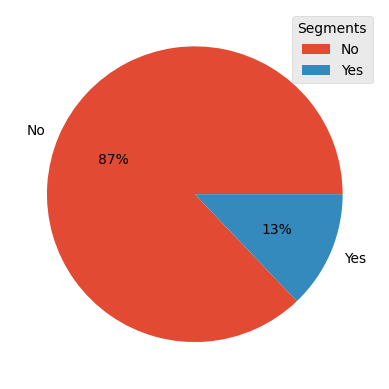

In [24]:
plt.pie(data['Heart Disease'].value_counts(), labels=data['Heart Disease'].value_counts().index,autopct='%.0f%%')
plt.legend(title='Segments')

plt.show()

In [25]:
data['BMI'].describe()

count     177363
unique         4
top        Obese
freq       70874
Name: BMI, dtype: object

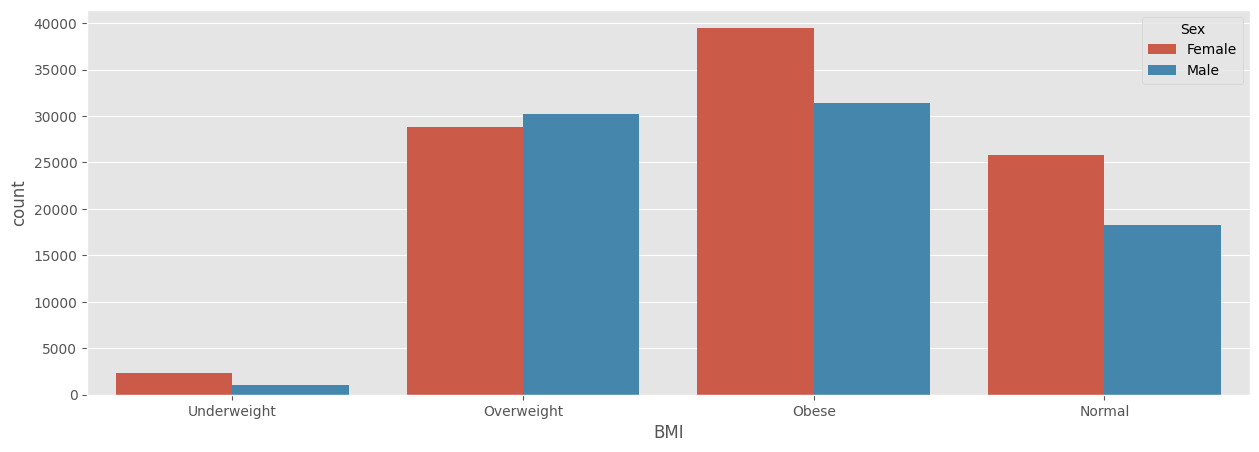

In [159]:
plt.figure(figsize=(15,5))

sns.countplot(x = data['BMI'], hue = data['Sex'])
plt.style.context('ggplot')

<Axes: >

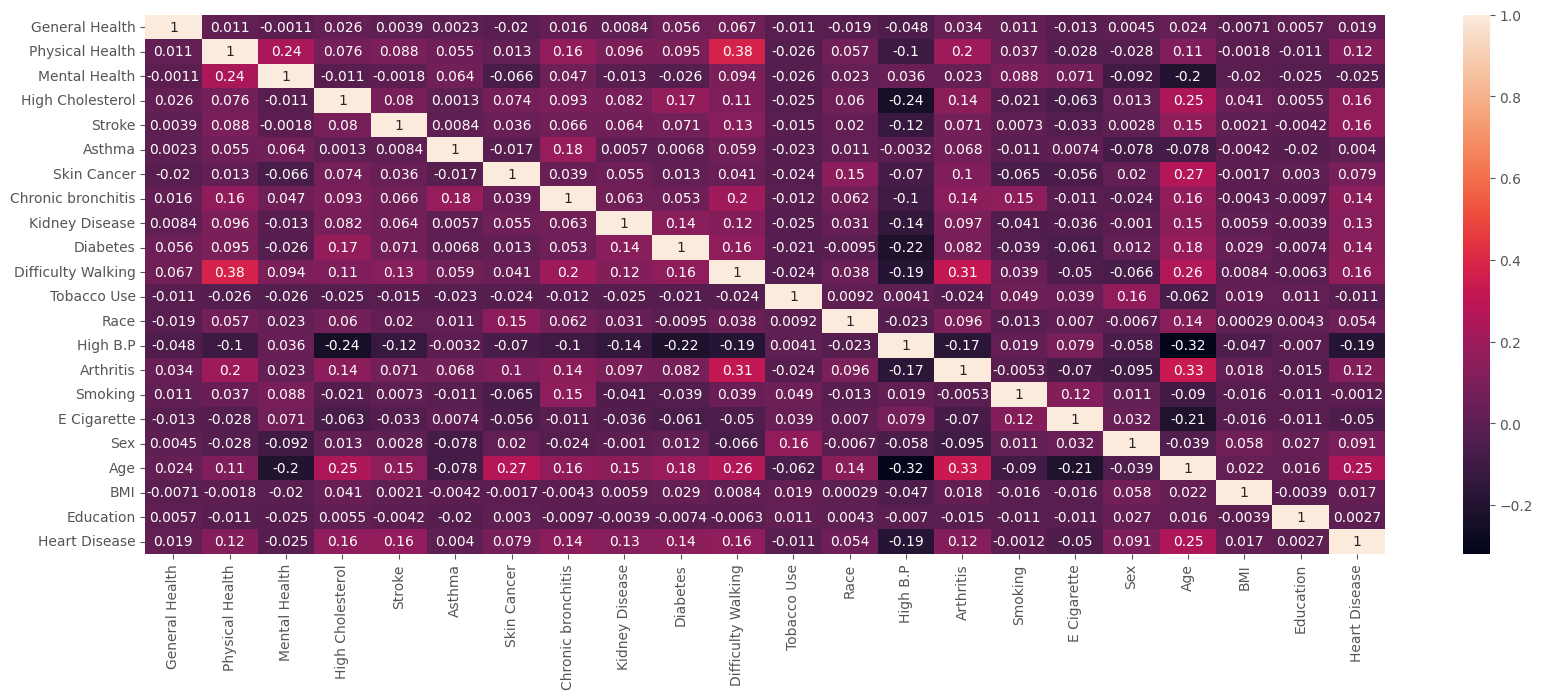

In [31]:
correlation= data.corr()
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True)

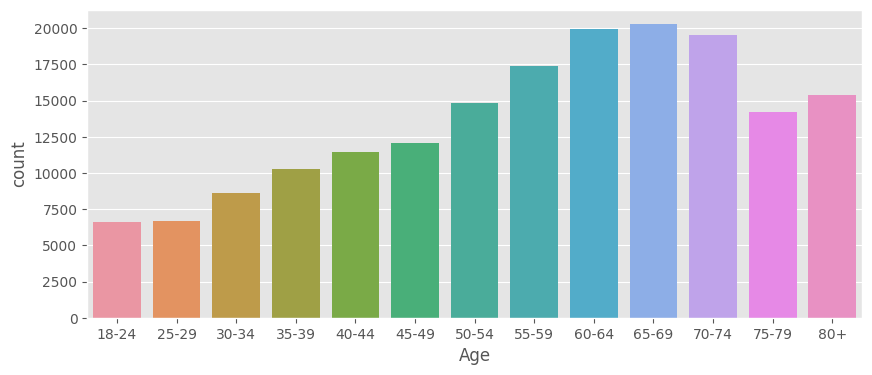

In [160]:
plt.figure(figsize=(10,4))
sns.countplot(x = data['Age'].sort_values())
plt.style.context('ggplot')

In [161]:
le = LabelEncoder()

obj_list = data.select_dtypes(include="object").columns

for obj in obj_list:
    data[obj] = le.fit_transform(data[obj].astype(str))

In [162]:
data.describe()

,General Health,Physical Health,Mental Health,High Cholesterol,Stroke,Asthma,Skin Cancer,Chronic bronchitis,Kidney Disease,Diabetes,...,Race,High B.P,Arthritis,Smoking,E Cigarette,Sex,Age,BMI,Education,Heart Disease
count,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,...,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000,177363.000000
mean,2.091276,6.197262,5.935099,0.455794,0.065634,0.201666,0.124395,0.130450,0.067038,0.213201,...,4.321262,0.506605,0.436540,0.178504,0.060080,0.456014,7.047096,1.123273,1.594588,0.128753
std,1.186695,9.956283,9.305441,0.498043,0.247641,0.401245,0.330032,0.336799,0.250088,0.409570,...,1.274970,0.499958,0.495958,0.382938,0.237636,0.498063,3.358803,0.802172,1.173899,0.334927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000
75%,3.000000,7.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,10.000000,2.000000,3.000000,0.000000
max,4.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,3.000000,3.000000,1.000000


# Logistic Regression(without class imbalance)

In [163]:
# Assuming your data is stored in a Pandas DataFrame called 'data'
x = data.drop('Heart Disease', axis=1)  # Feature variables
y = data['Heart Disease']  # Target variable

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
lr = LogisticRegression(penalty='l2' , C=0.8)

lr.fit(x_train , y_train )
print ('Train Score =>',lr.score(x_train , y_train ))
print ('Test Score =>',lr.score(x_test , y_test ))

Train Score => 0.8719501021918388
Test Score => 0.8746370478955826


In [40]:
y_pred = lr.predict(x_test)
print (classification_report(y_test  , lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     30973
           1       0.53      0.09      0.16      4500

    accuracy                           0.87     35473
   macro avg       0.71      0.54      0.54     35473
weighted avg       0.84      0.87      0.83     35473



In [41]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , lr.predict(x_test))
ev

array([[30611,   362],
       [ 4085,   415]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

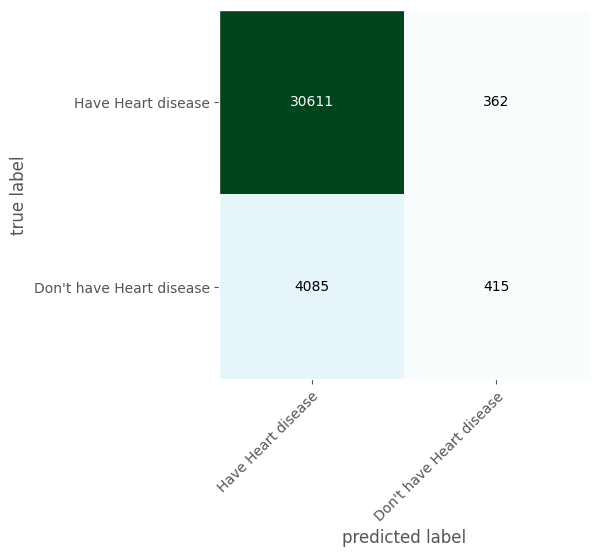

In [42]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(ev , class_names=["Have Heart disease","Don't have Heart disease"],cmap='BuGn')

# Neural Network

In [44]:
from sklearn.neural_network import MLPClassifier
# Create a neural network classifier with desired parameters
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)

# Train the classifier on the training data
nn_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nn_classifier.predict(x_test)


# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8764130465424407


In [45]:
print (classification_report(y_test  , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     30973
           1       0.56      0.12      0.20      4500

    accuracy                           0.88     35473
   macro avg       0.72      0.55      0.57     35473
weighted avg       0.84      0.88      0.84     35473



In [46]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , y_pred)
ev

array([[30534,   439],
       [ 3945,   555]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

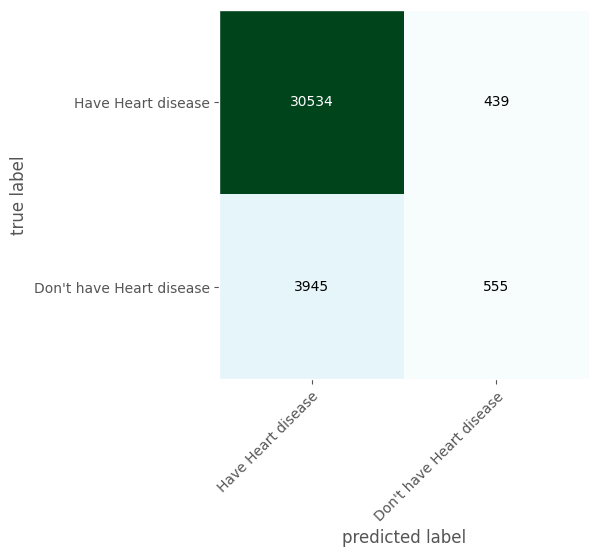

In [47]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(ev , class_names=["Have Heart disease","Don't have Heart disease"],cmap='BuGn')

# Naive Bayes Classifier

In [49]:
from sklearn.naive_bayes import GaussianNB
# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7842584500887999


In [50]:
print (classification_report(y_test  , y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     30973
           1       0.29      0.49      0.36      4500

    accuracy                           0.78     35473
   macro avg       0.60      0.66      0.62     35473
weighted avg       0.84      0.78      0.81     35473



In [51]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , y_pred)
ev

array([[25630,  5343],
       [ 2310,  2190]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

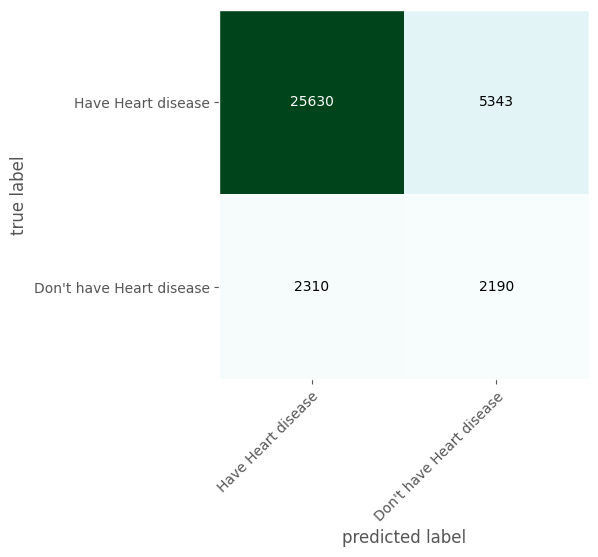

In [52]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(ev , class_names=["Have Heart disease","Don't have Heart disease"],cmap='BuGn')

# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Create a random forest classifier with desired parameters
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=30)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8658698164801398


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     30973
           1       0.41      0.13      0.20      4500

    accuracy                           0.87     35473
   macro avg       0.65      0.55      0.56     35473
weighted avg       0.83      0.87      0.83     35473



In [57]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , y_pred)
ev

array([[30117,   856],
       [ 3902,   598]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

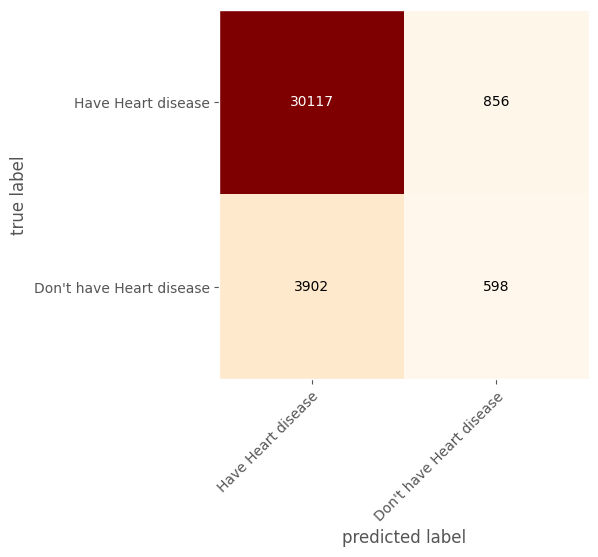

In [58]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(ev , class_names=["Have Heart disease","Don't have Heart disease"],cmap='OrRd')

# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# Create a KNN classifier with desired parameters
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8582020127984664


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     30973
           1       0.35      0.14      0.20      4500

    accuracy                           0.86     35473
   macro avg       0.62      0.55      0.56     35473
weighted avg       0.82      0.86      0.83     35473



In [69]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , y_pred)
ev

array([[29818,  1155],
       [ 3875,   625]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

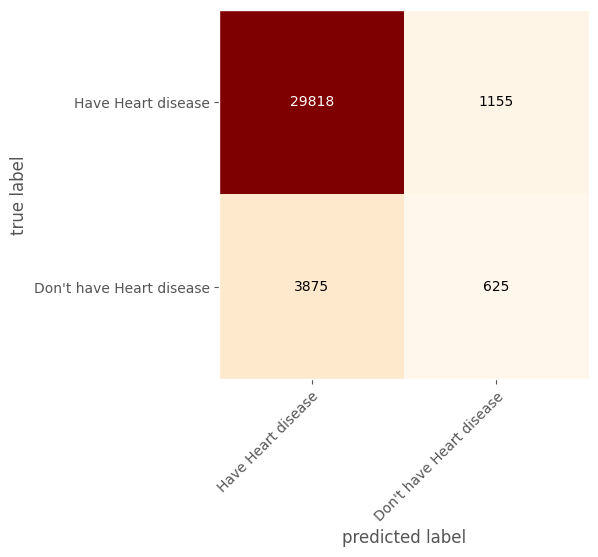

In [70]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(ev , class_names=["Have Heart disease","Don't have Heart disease"],cmap='OrRd')

# Support Vector Machine

In [71]:
from sklearn.svm import SVC

In [72]:
# Create an SVM classifier with desired parameters
svm_classifier = SVC(kernel='rbf')

# Train the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8731429537958447


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     30973
           1       0.00      0.00      0.00      4500

    accuracy                           0.87     35473
   macro avg       0.44      0.50      0.47     35473
weighted avg       0.76      0.87      0.81     35473



In [74]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , y_pred)
ev

array([[30973,     0],
       [ 4500,     0]])

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(ev , class_names=["Have Heart disease","Don't have Heart disease"],cmap='OrRd')

# XG Boost

In [75]:
import xgboost as xgb

In [76]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875031714261551


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     30973
           1       0.53      0.13      0.21      4500

    accuracy                           0.88     35473
   macro avg       0.71      0.56      0.57     35473
weighted avg       0.84      0.88      0.84     35473



In [78]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , y_pred)
ev

array([[30447,   526],
       [ 3907,   593]])

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(ev , class_names=["Have Heart disease","Don't have Heart disease"],cmap='OrRd')

# Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
# Gradient Boosting Classifier (GBM)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=30)
gbm.fit(x_train, y_train)
gbm_predictions = gbm.predict(x_test)
gbm_accuracy = accuracy_score(y_test, gbm_predictions)
print("GBM Accuracy:", gbm_accuracy)

GBM Accuracy: 0.8763002847235926


In [81]:
print(classification_report(y_test, gbm_predictions))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     30973
           1       0.57      0.10      0.17      4500

    accuracy                           0.88     35473
   macro avg       0.73      0.54      0.55     35473
weighted avg       0.84      0.88      0.84     35473



In [82]:
ev = confusion_matrix(y_test , gbm_predictions)
ev

array([[30642,   331],
       [ 4057,   443]])

In [ ]:
plot_confusion_matrix(ev , class_names=["Have Heart disease","Don't have Heart disease"],cmap='OrRd')

# Ada Boost

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=30)

# Train the classifier on the training data
adaboost.fit(x_train, y_train)

# Make predictions on the testing data
predictions = adaboost.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8759619992670482


In [85]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     30973
           1       0.55      0.12      0.20      4500

    accuracy                           0.88     35473
   macro avg       0.72      0.55      0.57     35473
weighted avg       0.84      0.88      0.84     35473



In [86]:
ev = confusion_matrix(y_test , predictions)
ev

array([[30527,   446],
       [ 3954,   546]])

In [ ]:
plot_confusion_matrix(ev , class_names=["Have Heart disease","Don't have Heart disease"],cmap='OrRd')

# Light Gradient Boosting

In [87]:
import lightgbm as lgb

In [88]:
# LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(x_train, y_train)
lgb_predictions = lgb_model.predict(x_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
print("LightGBM Accuracy:", lgb_accuracy)

LightGBM Accuracy: 0.8785837115552674


In [89]:
print(classification_report(y_test, lgb_predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     30973
           1       0.61      0.12      0.20      4500

    accuracy                           0.88     35473
   macro avg       0.75      0.56      0.57     35473
weighted avg       0.85      0.88      0.84     35473



In [90]:
ev = confusion_matrix(y_test , lgb_predictions)
ev

array([[30614,   359],
       [ 3948,   552]])

In [ ]:
plot_confusion_matrix(ev , class_names=["Have Heart disease","Don't have Heart disease"],cmap='OrRd')

# New Section

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Assuming you have a list of 10 different machine learning models in 'models_list'
models_list = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    LGBMClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier()
    # or any other models you want to compare
]

# Assuming 'X' is your feature matrix and 'y' is the target variable

# Define the evaluation metrics you want to use
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Evaluate each model using cross-validation and store the results
results = []
for model in models_list:
    model_name = type(model).__name__
    scores = cross_validate(model, x, y, cv=5, scoring=scoring)
    avg_scores = {metric: scores[f'test_{metric}'].mean() for metric in scoring}
    avg_scores['Model'] = model_name
    results.append(avg_scores)

# Create a pandas DataFrame to store the results
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)

# Addressing the Class Imbalance

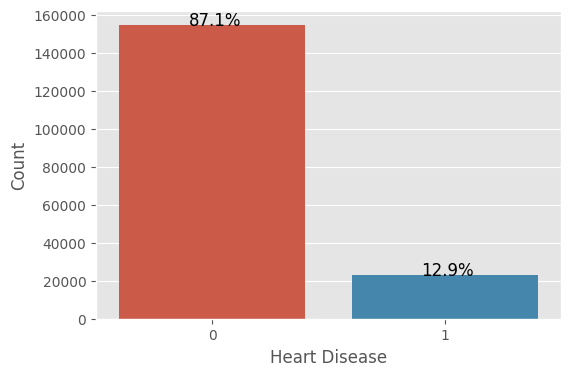

In [91]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data["Heart Disease"])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), size=12)
plt.show()

# Random Under Sampling

In [92]:
# Make a count for each one to know it's size
count_0, count_1 = data['Heart Disease'].value_counts()

#Divid by class
data_0 = data[data['Heart Disease'] == 0] # for No majority
data_1 = data[data['Heart Disease']== 1] # for Yes minority

In [93]:
count_0, count_1

(154527, 22836)

In [94]:
print(data_0.shape)
print(data_1.shape)

(154527, 22)
(22836, 22)


In [95]:
# Make a sample from majority have the same size of minority
data_0_sample = data_0.sample(count_1)
data_0_sample.shape

(22836, 22)

In [96]:
# Create the balanced dataset

data_balanced_under = pd.concat([data_0_sample, data_1], axis=0)
data_balanced_under.shape

print('The Random undersampling')
print(data_balanced_under['Heart Disease'].value_counts())

The Random undersampling
0    22836
1    22836
Name: Heart Disease, dtype: int64


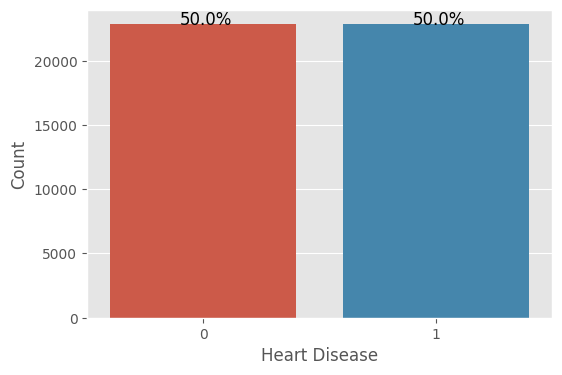

In [97]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data_balanced_under["Heart Disease"])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
total = len(data_balanced_under)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), size=12)
plt.show()

In [98]:
x = data_balanced_under.drop("Heart Disease" , axis = 1).values
y = data_balanced_under['Heart Disease'].values

In [99]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state= 42)

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [101]:
lr = LogisticRegression(penalty='l2' , C=0.8)

lr.fit(x_train , y_train )
print ('Train Score =>',lr.score(x_train , y_train ))
print ('Test Score =>',lr.score(x_test , y_test ))

Train Score => 0.721049894627364
Test Score => 0.7210727969348659


In [102]:
y_pred = lr.predict(x_test)
print (classification_report(y_test  , lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      4540
           1       0.71      0.75      0.73      4595

    accuracy                           0.72      9135
   macro avg       0.72      0.72      0.72      9135
weighted avg       0.72      0.72      0.72      9135



# AdaBoost

In [103]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=30)

# Train the classifier on the training data
adaboost.fit(x_train, y_train)

# Make predictions on the testing data
predictions = adaboost.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7235905856595511


In [104]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      4540
           1       0.71      0.76      0.73      4595

    accuracy                           0.72      9135
   macro avg       0.72      0.72      0.72      9135
weighted avg       0.72      0.72      0.72      9135



In [105]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , predictions)
ev

array([[3128, 1412],
       [1113, 3482]])

# Light Gradient Boosting

In [106]:
# LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(x_train, y_train)
lgb_predictions = lgb_model.predict(x_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
print("LightGBM Accuracy:", lgb_accuracy)

LightGBM Accuracy: 0.7383689107827038


In [107]:
print(classification_report(y_test, lgb_predictions))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      4540
           1       0.72      0.79      0.75      4595

    accuracy                           0.74      9135
   macro avg       0.74      0.74      0.74      9135
weighted avg       0.74      0.74      0.74      9135



In [108]:
ev = confusion_matrix(y_test , lgb_predictions)
ev

array([[3111, 1429],
       [ 961, 3634]])

# Gradient Boosting Classifier

In [109]:
# Gradient Boosting Classifier (GBM)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=30)
gbm.fit(x_train, y_train)
gbm_predictions = gbm.predict(x_test)
gbm_accuracy = accuracy_score(y_test, gbm_predictions)
print("GBM Accuracy:", gbm_accuracy)

GBM Accuracy: 0.7316912972085385


In [110]:
print(classification_report(y_test, gbm_predictions))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      4540
           1       0.71      0.78      0.75      4595

    accuracy                           0.73      9135
   macro avg       0.73      0.73      0.73      9135
weighted avg       0.73      0.73      0.73      9135



In [111]:
ev = confusion_matrix(y_test , gbm_predictions)
ev

array([[3086, 1454],
       [ 997, 3598]])

# Logistic Regression

In [112]:
lr = LogisticRegression(penalty='l2' , C=0.5)

lr.fit(x_train , y_train )
print ('Train Score =>',lr.score(x_train , y_train ))
print ('Test Score =>',lr.score(x_test , y_test ))

Train Score => 0.721049894627364
Test Score => 0.7210727969348659


In [113]:
y_pred = lr.predict(x_test)
print (classification_report(y_test  , lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      4540
           1       0.71      0.75      0.73      4595

    accuracy                           0.72      9135
   macro avg       0.72      0.72      0.72      9135
weighted avg       0.72      0.72      0.72      9135



In [114]:
ev = confusion_matrix(y_test , lr.predict(x_test))
ev

array([[3140, 1400],
       [1148, 3447]])

# Random Forest Classifier

In [115]:
# Create a random forest classifier with desired parameters
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=30)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7184455391351943


In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.70      4540
           1       0.70      0.76      0.73      4595

    accuracy                           0.72      9135
   macro avg       0.72      0.72      0.72      9135
weighted avg       0.72      0.72      0.72      9135



In [117]:
ev = confusion_matrix(y_test , y_pred)
ev

array([[3070, 1470],
       [1102, 3493]])

# Neural Network Model

In [118]:
# Create a neural network classifier with desired parameters
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), random_state=30)

# Train the classifier on the training data
nn_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nn_classifier.predict(x_test)


# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7187739463601532


In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      4540
           1       0.70      0.78      0.74      4595

    accuracy                           0.72      9135
   macro avg       0.72      0.72      0.72      9135
weighted avg       0.72      0.72      0.72      9135



In [120]:
ev = confusion_matrix(y_test , y_pred)
ev

array([[2983, 1557],
       [1012, 3583]])

# KNN

In [130]:
# Create a KNN classifier with desired parameters
knn_classifier = KNeighborsClassifier(n_neighbors=14)

# Train the classifier on the training data
knn_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7047619047619048


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      4540
           1       0.71      0.70      0.71      4595

    accuracy                           0.70      9135
   macro avg       0.70      0.70      0.70      9135
weighted avg       0.70      0.70      0.70      9135



In [132]:
ev = confusion_matrix(y_test , y_pred)
ev

array([[3210, 1330],
       [1367, 3228]])

# Support Vector Machine

In [133]:
# Create an SVM classifier with desired parameters
svm_classifier = SVC(kernel='rbf')

# Train the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7259989053092502


In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.71      4540
           1       0.70      0.79      0.74      4595

    accuracy                           0.73      9135
   macro avg       0.73      0.73      0.72      9135
weighted avg       0.73      0.73      0.72      9135



In [135]:
ev = confusion_matrix(y_test , y_pred)
ev

array([[3016, 1524],
       [ 979, 3616]])

# Naive Bayes

In [136]:
# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6874657909140668


In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      4540
           1       0.70      0.67      0.68      4595

    accuracy                           0.69      9135
   macro avg       0.69      0.69      0.69      9135
weighted avg       0.69      0.69      0.69      9135



In [138]:
ev = confusion_matrix(y_test , y_pred)
ev

array([[3216, 1324],
       [1531, 3064]])

# XG Boost

In [139]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7258894362342638


In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      4540
           1       0.71      0.76      0.74      4595

    accuracy                           0.73      9135
   macro avg       0.73      0.73      0.73      9135
weighted avg       0.73      0.73      0.73      9135



In [141]:
ev = confusion_matrix(y_test , y_pred)
ev

array([[3121, 1419],
       [1085, 3510]])

# New Section

In [147]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Assuming you have a list of 10 different machine learning models in 'models_list'
models_list = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    LGBMClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier()
    # or any other models you want to compare
]

# Assuming 'X' is your feature matrix and 'y' is the target variable

# Define the evaluation metrics you want to use
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Evaluate each model using cross-validation and store the results
results = []
for model in models_list:
    model_name = type(model).__name__
    scores = cross_validate(model, x, y, cv=5, scoring=scoring)
    avg_scores = {metric: scores[f'test_{metric}'].mean() for metric in scoring}
    avg_scores['Model'] = model_name
    results.append(avg_scores)

# Create a pandas DataFrame to store the results
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)


   accuracy  precision    recall        f1                       Model
0  0.719938   0.708175  0.748161  0.727598          LogisticRegression
1  0.716457   0.701658  0.753153  0.726455      RandomForestClassifier
2  0.724273   0.696805  0.794053  0.742222                         SVC
3  0.678030   0.667741  0.708618  0.687521        KNeighborsClassifier
4  0.685431   0.694649  0.661762  0.677803                  GaussianNB
5  0.725215   0.714420  0.750438  0.731944          AdaBoostClassifier
6  0.738724   0.718752  0.784375  0.750090              LGBMClassifier
7  0.729375   0.714642  0.763750  0.738337               XGBClassifier
8  0.731302   0.711550  0.777982  0.743244  GradientBoostingClassifier
9  0.729090   0.721570  0.746846  0.733620               MLPClassifier
